In [2]:
! pip install instaloader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for instaloader: filename=instaloader-4.12-py3-none-any.whl size=66747 sha256=20d614d0c9b4b5a695b1ec475d90b6747f7d298dac63794632f798db29e5588a
  Stored in directory: /root/.cache/pip/wheels/22/ca/b6/7f3328e7b9fddcfada249d7d4f9a3eacb3326c3fd23433a1d4
Successfully built instaloader


In [3]:
import os
import instaloader
import time
import os
import networkx as nx
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [10]:
data_dir = "data"  # Directory to store data
my_username = 'brianna_bv'
my_password = 'Ayelen03'

# Create data directory if it doesn't exist
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

def get_friends(loader, username):
    print(f"Fetching friends for user: {username}")

    try:
        profile = instaloader.Profile.from_username(loader.context, username)
        followers = profile.get_followers()
        followees = profile.get_followees()

        friends = set(followers).intersection(followees)
        friends_username = [friend.username for friend in friends]

        print(f"Friends of {username}: {friends_username}")

        # Save friends data to file
        with open(os.path.join(data_dir, profile.username + '.txt'), 'w') as f:
            f.write('\n'.join(friends_username))

        # Add delay to prevent too many requests
        time.sleep(10)

    except instaloader.exceptions.ConnectionException as e:
        print(f"Connection error while fetching friends for {username}: {e}")
        time.sleep(10)  # Wait before retrying
    except instaloader.exceptions.ProfileNotExistsException:
        print(f"Profile {username} does not exist.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Initialize Instaloader and login
loader = instaloader.Instaloader()
print("Logging in...")
try:
    loader.login(my_username, my_password)
    print("Login successful")
except instaloader.exceptions.BadCredentialsException:
    print("Invalid credentials provided.")
    exit(1)
except instaloader.exceptions.ConnectionException as e:
    print(f"Connection error during login: {e}")
    exit(1)
except Exception as e:
    print(f"An unexpected error occurred during login: {e}")
    exit(1)

# Find my friends
try:
    my_profile = instaloader.Profile.from_username(loader.context, my_username)
    my_followers = my_profile.get_followers()
    my_followees = my_profile.get_followees()

    my_friends = set(my_followers).intersection(my_followees)
    my_friends_username = [friend.username for friend in my_friends]

    print(f"My friends: {my_friends_username}")

    # Save friends data for each friend
    for username in my_friends_username:
        print(f"Processing user: {username}")
        if not os.path.isfile(os.path.join(data_dir, username + '.txt')):
            get_friends(loader, username)

    print("Data fetching completed.")
except instaloader.exceptions.ConnectionException as e:
    print(f"Connection error while fetching friends: {e}")
except instaloader.exceptions.ProfileNotExistsException:
    print(f"Profile {my_username} does not exist.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Logging in...
Login successful
My friends: ['danieelpuc', 'joseramongamboapinzon', '4sansores_16', '_.dayylight', 'buenfilcervantes', 'danyyyxcontrerass', 'angellopez.es', 'yoshda43', 'letni.robles', 'berepucc', 'gustavin_123', 'gio_perez14', 'aaron_polanco_08', 'mono.glowup', 'luis.david.mtz', 'page.monii', 'mariana_dominguez_6', 'gualbert_cetina', 'ash._.1112', 'mikey_pgc', 'karimecanulpp', 'teddybearkda', '_kcanche', 'jair_mtz_', 'yeyistoon_', 'emilio03_bc', 'just_a_sadly_jorgelajirafa', 'danielgarnica04', 'diego.monroy.25', 'adolfo_poot', 'emma_g_d_', 'jessyssm', 'eymy_cm', 'roberthoayala', 'thay.manjiro', 'angelsaenz_c', 'brendaa_leaal', '_cynthiaov', 'djmemo._', 'outsidermagazine_', '_alebarbosaa', 'luiscota_23', 'gabriel_cuevas_73', '_kikemorales_', 'soniamendia', 'paolo_rivas23', 'itsmojarrita', 'fer.dom.21', 'airam_dolguin_', 'cinnamonroll_rt', 'ancheyta.vic', '_antonionolasco', 'davidquijano_', 'freakboy.22', 'angie_rojano_leal', 'dafnem.cruz', 'jatziri_geraldine', 'hector_ch

HTTP Error 400 (Bad Request) on GraphQL Query. Retrying with shorter page length.
HTTP Error 400 (Bad Request) on GraphQL Query. Retrying with shorter page length.


An error occurred: 400 Bad Request - "fail" status, message "checkpoint_required" when accessing https://www.instagram.com/graphql/query?query_hash=37479f2b8209594dde7facb0d904896a&variables=%7B%22id%22%3A%221548568690%22%2C%22first%22%3A12%2C%22after%22%3A%22QVFBYmMzMkpnaUdZbXBidjNSaS1IRE5nU1BpWGtPU0lLMGZQM0Q4dGFnR29hY2c1ZVFGNTItNTlYLVVncmExZy1QME1XRDcyM18xUFlMV2g3TkpUeG5HUg%3D%3D%22%7D
Processing user: gabriel_cuevas_73
Fetching friends for user: gabriel_cuevas_73
An error occurred: 400 Bad Request - "fail" status, message "challenge_required" when accessing https://i.instagram.com/api/v1/users/web_profile_info/?username=gabriel_cuevas_73
Processing user: _kikemorales_
Fetching friends for user: _kikemorales_
An error occurred: 400 Bad Request - "fail" status, message "challenge_required" when accessing https://i.instagram.com/api/v1/users/web_profile_info/?username=_kikemorales_
Processing user: soniamendia
Fetching friends for user: soniamendia
An error occurred: 400 Bad Request - 

In [20]:
data_dir = 'data'

G = nx.Graph()

for filename in os.listdir(data_dir):
    if filename.endswith(".txt"):
        file_path = os.path.join(data_dir, filename)
        with open(file_path, 'r') as file:
            users = file.read().strip().split('\n')
            for i in range(len(users)):
                for j in range(i + 1, len(users)):
                    G.add_edge(users[i], users[j])


edgelist_path = 'graph.edgelist'
nx.write_edgelist(G, edgelist_path, data=False)

print(f"Grafo exportado a {edgelist_path}")


Grafo exportado a graph.edgelist


In [4]:
edgelist_path = 'graph.edgelist'
G = nx.read_edgelist(edgelist_path)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)

<Figure size 1200x1200 with 0 Axes>

In [5]:
connected_components = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

# Mostrar algunas estadísticas
print("Número de nodos:", G.number_of_nodes())
print("Número de aristas:", G.number_of_edges())

Número de nodos: 10540
Número de aristas: 3016242


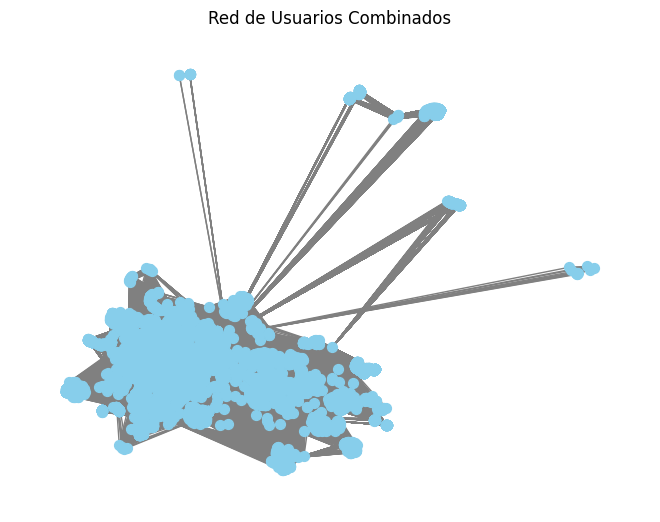

In [6]:
nx.draw(G, pos, with_labels=False, node_size=50, node_color="skyblue", edge_color="gray")
plt.title("Red de Usuarios Combinados")
plt.show()

In [25]:
print("Average degree:", sum(dict(G.degree()).values())/float(G.number_of_nodes()))
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
print("Degree distribution:", degree_sequence)

Average degree: 572.341935483871
Degree distribution: [10539, 4538, 4481, 4343, 4254, 4239, 4197, 4000, 3988, 3960, 3953, 3889, 3882, 3878, 3870, 3818, 3808, 3799, 3788, 3725, 3615, 3560, 3544, 3539, 3487, 3443, 3426, 3392, 3313, 3298, 3270, 3269, 3267, 3183, 3114, 3086, 3072, 3071, 3053, 3045, 3042, 3041, 3033, 3018, 3010, 2984, 2936, 2924, 2924, 2906, 2899, 2899, 2886, 2873, 2850, 2816, 2806, 2801, 2782, 2770, 2767, 2761, 2754, 2713, 2707, 2692, 2675, 2656, 2646, 2640, 2597, 2591, 2584, 2572, 2567, 2567, 2563, 2535, 2534, 2533, 2530, 2523, 2518, 2502, 2497, 2495, 2490, 2482, 2473, 2471, 2466, 2460, 2457, 2432, 2430, 2427, 2412, 2405, 2396, 2383, 2380, 2374, 2374, 2372, 2354, 2353, 2348, 2348, 2347, 2333, 2331, 2330, 2321, 2320, 2286, 2280, 2280, 2274, 2270, 2268, 2267, 2264, 2243, 2243, 2235, 2234, 2218, 2213, 2211, 2206, 2192, 2183, 2183, 2182, 2174, 2169, 2169, 2164, 2163, 2163, 2162, 2159, 2154, 2146, 2140, 2138, 2137, 2121, 2120, 2119, 2091, 2081, 2067, 2067, 2063, 2053, 2050, 20

In [9]:
# Initialize centrality dictionaries
degree_centrality = {}

# Number of nodes in the graph
num_nodes = len(G.nodes)

# Degree Centrality
print("Calculating Degree Centrality")
for node in tqdm(G.nodes, desc="Degree Centrality", total=num_nodes):
    degree_centrality[node] = nx.degree_centrality(G)[node]
    time.sleep(0.01)  # Simulate time-consuming calculation

print("\nDegree Centrality:", degree_centrality, "\n")

Calculating Degree Centrality


Degree Centrality:   0%|          | 0/10540 [00:00<?, ?it/s]


Degree Centrality: {'bryan_pech': 0.20523768858525476, 'aranzaestrella_': 0.16026188442926273, 'skinnyflakkkkko': 0.06841256286175158, '_whois.aylin': 0.10541797134452985, 'im.abogadri': 0.06841256286175158, 'nay_paredesch': 0.06841256286175158, 'berepucc': 0.36047063288737075, 'toloshaaa': 0.24319195369579658, 'julieta_8261': 0.06841256286175158, 'alicate.kt': 0.06841256286175158, 'icarlyprivv': 0.09754246133409242, 'mikezomboy': 0.06841256286175158, 'vickvapo8420': 0.06841256286175158, 'gussarq': 0.06841256286175158, 'andrea_gallegosss': 0.26197931492551474, 'addonysespadas': 0.06841256286175158, 'dara_prp': 0.23446247272037196, 'paolaorozcoig': 0.08729480975424614, 'geouribe_': 0.06841256286175158, 'americairv': 0.06841256286175158, 'hanniaamg': 0.06841256286175158, 'aileabp': 0.06841256286175158, 'sleeep4_': 0.06841256286175158, 'emilio03_bc': 0.24053515513805865, 'nineth_dorantes3': 0.06841256286175158, 'cristian.u.c': 0.06841256286175158, 'alvaralejandro_': 0.06841256286175158, 

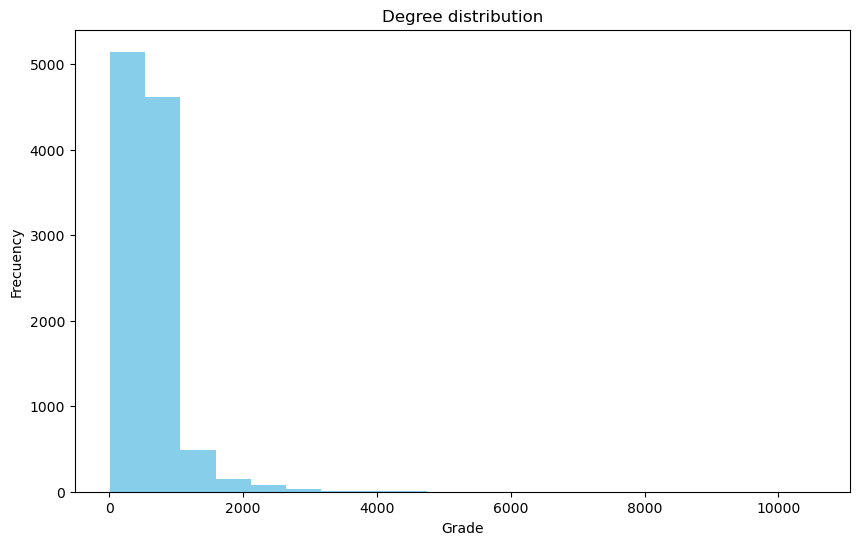

In [4]:
# Degree distribution
degrees = [G.degree(n) for n in G.nodes()]
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=20, color='skyblue')
plt.title("Degree distribution")
plt.xlabel("Grade")
plt.ylabel("Frecuency")
plt.show()

In [26]:
print("Degree of centrality (top 5):", sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])
print("Number of connected components:", len(connected_components))
print("Size of connected components:", connected_components)

Degree of centrality (top 5): [('brianna_bv', 1.0), ('buenfilcervantes', 0.4305911376790967), ('danyyyxcontrerass', 0.4251826549008445), ('xneryzv_', 0.41208843343770757), ('xx.monicx', 0.403643609450612)]
Number of connected components: 1
Size of connected components: [10540]


In [27]:
# Initialize an empty dictionary for clustering coefficients
clustering_coeffs = {}

# Calculate clustering coefficients with a progress bar
for node in tqdm(G.nodes, desc="Calculating Clustering Coefficients"):
    clustering_coeffs[node] = nx.clustering(G, node)

# Calculate the average clustering coefficient
average_clustering = np.mean(list(clustering_coeffs.values()))

# Print the average clustering coefficient
print("\nAverage Clustering Coefficient:", average_clustering)

Calculating Clustering Coefficients: 100%|██████████| 10540/10540 [16:35<00:00, 10.59it/s]


Average Clustering Coefficient: 0.9334460003636816


In [18]:
# Initialize an empty dictionary for shortest paths
shortest_paths = {}

# Calculate all pairs shortest path lengths with a progress bar
for node in tqdm(G.nodes, desc="Calculating Shortest Paths"):
    shortest_paths[node] = nx.single_source_shortest_path_length(G, node)

# Calculate the average shortest path length
average_shortest_path_length = np.mean([length for paths in shortest_paths.values() for length in paths.values()])

# Print the average shortest path length
print("\nAverage Shortest Path Length:", average_shortest_path_length)

Calculating Shortest Paths: 100%|██████████| 10540/10540 [02:39<00:00, 65.93it/s] 


Average Shortest Path Length: 1.945508355267185


In [28]:
# Initialize a variable for the maximum eccentricity (i.e., the diameter)
diameter = 0

# Calculate the diameter with a progress bar
for node in tqdm(G.nodes, desc="Calculating Network Diameter"):
    eccentricity = nx.eccentricity(G, node)
    if eccentricity > diameter:
        diameter = eccentricity

# Print the diameter of the network
print("\nNetwork Diameter:", diameter)

Calculating Network Diameter: 100%|██████████| 10540/10540 [02:35<00:00, 67.65it/s] 


Network Diameter: 2


In [5]:
# Centralization
def network_centralization(G, centrality_metric):
    centrality = centrality_metric(G)
    max_centrality = max(centrality.values())
    n = len(G)
    centralization = sum(max_centrality - c for c in centrality.values()) / (n - 1)
    return centralization

In [10]:
# Robustness and Vulnerability
# Eliminate nodes with higher degree centrality and observe the change in the size of the largest component.
sorted_by_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
G_robustness = G.copy()
removed_nodes = []
largest_components = []
for node, _ in sorted_by_degree[:10]:  # Eliminating the 10 nodes with the highest degree centrality
    G_robustness.remove_node(node)
    removed_nodes.append(node)
    largest_components.append(len(max(nx.connected_components(G_robustness), key=len)))

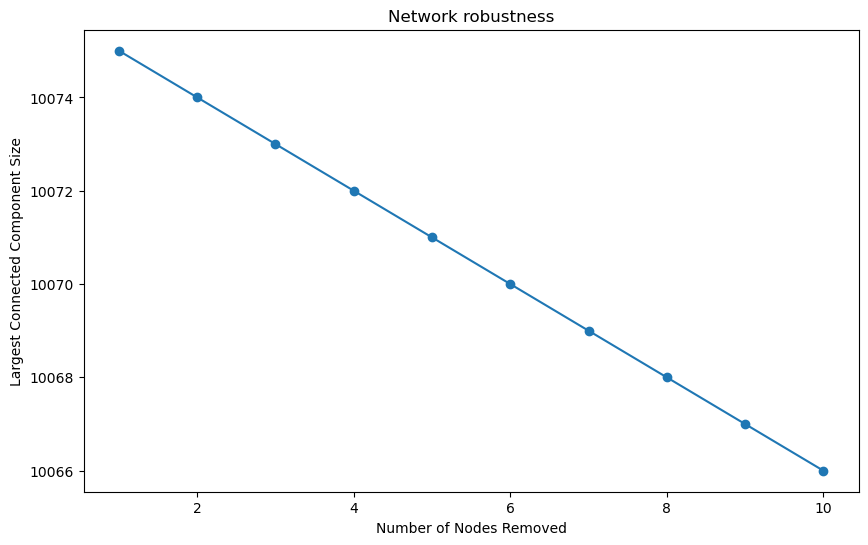


Removed nodes: ['brianna_bv', 'buenfilcervantes', 'danyyyxcontrerass', 'xneryzv_', 'xx.monicx', 'mafer_gc04', 'lozanoedwin09', 'priscilacentella', 'allan.medina.vargas', 'fer.dom.21']


In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), largest_components, marker='o')
plt.title("Network robustness")
plt.xlabel("Number of Nodes Removed")
plt.ylabel("Largest Connected Component Size")
plt.show()

print("\nRemoved nodes:", removed_nodes)

In [20]:
from networkx.algorithms.community import greedy_modularity_communities
communities = list(greedy_modularity_communities(G))

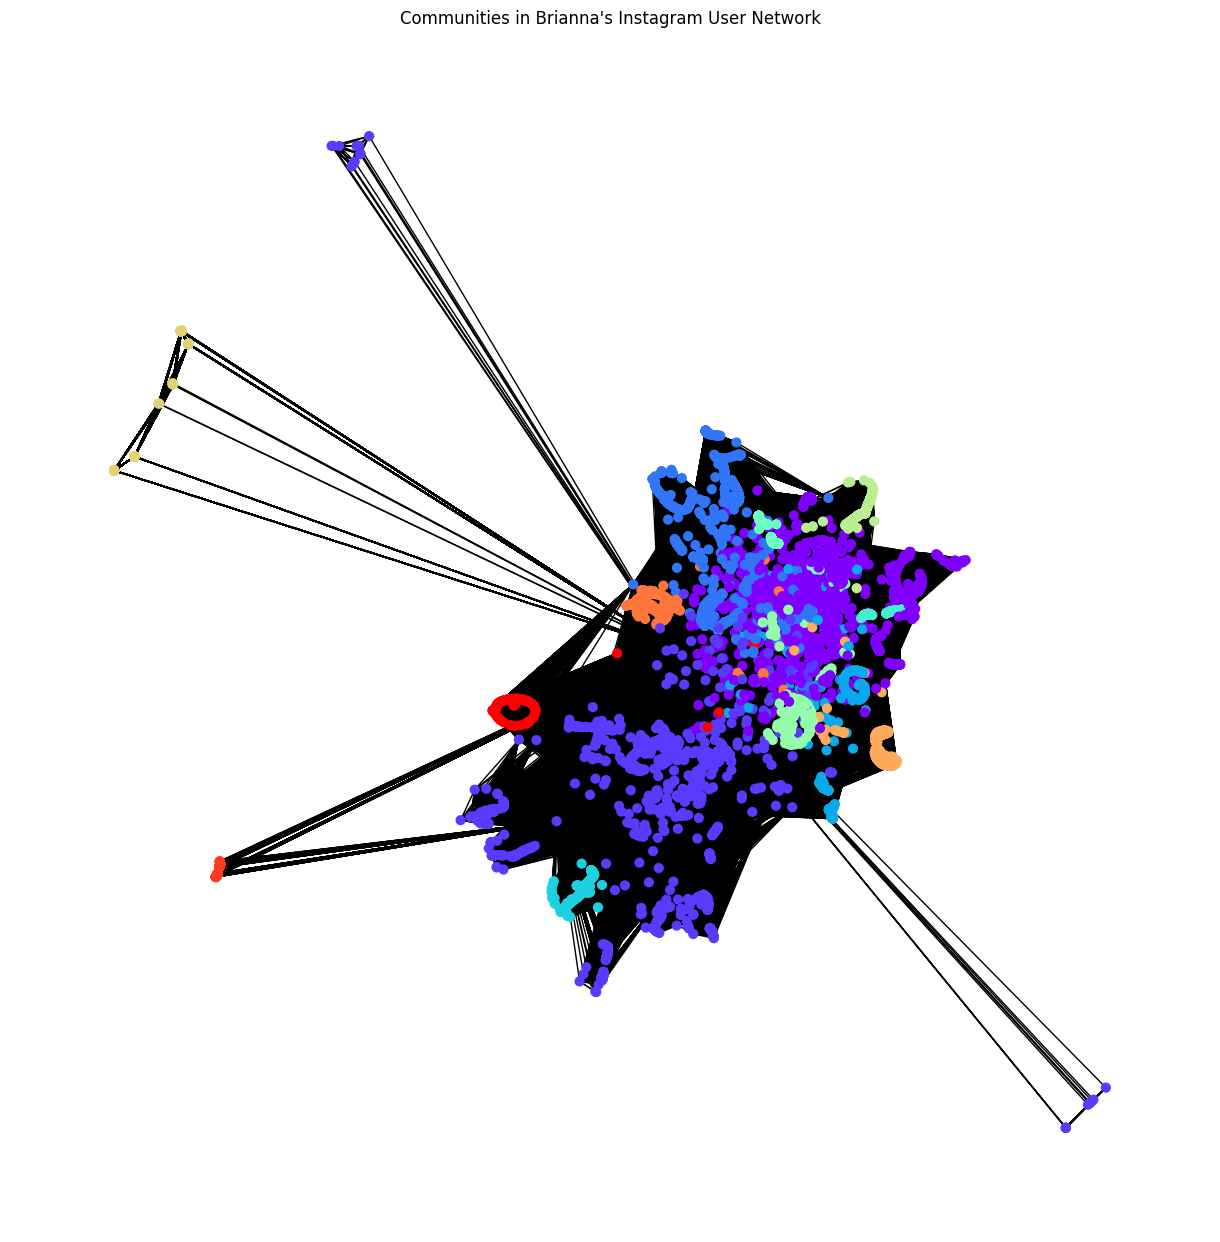

In [22]:
# Crear un diccionario para almacenar a qué comunidad pertenece cada nodo
node_community = {}
for i, community in enumerate(communities):
    for node in community:
        node_community[node] = i

# Visualizar las comunidades
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 12))

colors = [node_community[node] for node in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=False, node_size=40, cmap=plt.cm.rainbow)
plt.title("Communities in Brianna's Instagram User Network")
plt.show()

In [23]:
# show communities
for i, community in enumerate(communities):
    print(f"\nComunnity {i + 1}: {list(community)}")


Comunnity 1: ['bruno._.cancino', 'valeria.verdejo', 'samuelhenders0n', 'edar__chacon', 'shinny_mid', 'ximeeenx', 'daniguitarr', 'danielasulub_', 'im.gennne', '_ddevilz', 'juanpa_es19', 'miguel_17j', 'marielrosalesss', 'eduardo_alcocerp', 'gini.avila324', '_nanoteca', 'whoisjxvier._', '_juanpablo19', 'gabysoloveichik_', '_joss_bae', 'emilio03_bc', 'emmanuel.1993', 'marianita_pache', 'ancheyta.vic', 'ramon.op_', 'alex_poot29', 'oscar.mnfrt03', 'rudyy_novelo_', 'magui_hernandez_pat', '__estela.bojorquez', 'elena_campos72', 'ann_11030', 'akajuxn', 'marijose_santosc24', 'angelybcc', 'andyy_alvarezf', 'berecardenas_', 'charlystonks', 'ayeshaherrera', 'fermar_tin', 'jesusparedes84', 'adaireliperez', 'amayrani5360', 'martha_elizalde12', 'alis_rdgz', 'xiomarasalazarx', 'gianng_r.c', 'carolifran04', 'sinai_mendi', 'alexbojorqz', 'julio._.delangel', 'rus.sellgio', 'paolivv_', 'salukabazar', 'grx_cv', 'gaeltejera', 'jhoa__so', 'iamjazmingtz', 'esteban.qp', 'ivanaaguayo', 'mishel_pacheco_', 'diana

In [3]:
import random
from sklearn.metrics import roc_auc_score, average_precision_score
from itertools import combinations
from networkx.algorithms.link_prediction import adamic_adar_index, jaccard_coefficient, preferential_attachment

# Split the network into training and testing sets
G_train = G.copy()
edges_to_remove = random.sample(list(G.edges()), int(0.3 * G.number_of_edges()))
G_train.remove_edges_from(edges_to_remove)
non_edges = list(nx.non_edges(G_train))

# Select pairs to predict
n_samples = 1000
test_pairs = random.sample(non_edges, n_samples)
test_pairs_labels = [1 if G.has_edge(u, v) else 0 for u, v in test_pairs]

# Function to calculate and print link prediction scores without progress bar
def link_prediction_scores(G_train, test_pairs):
    predictors = {
        'Adamic/Adar': adamic_adar_index,
        'Jaccard Coefficient': jaccard_coefficient,
        'Preferential Attachment': preferential_attachment
    }
    for name, predictor in predictors.items():
        scores = []
        for u, v, p in predictor(G_train, test_pairs):
            scores.append(p)
        auc = roc_auc_score(test_pairs_labels, scores)
        ap = average_precision_score(test_pairs_labels, scores)
        print(f'{name} - AUC: {auc:.4f}, AP: {ap:.4f}')

print("\n")

link_prediction_scores(G_train, test_pairs)



Adamic/Adar - AUC: 0.9999, AP: 0.9931
Jaccard Coefficient - AUC: 1.0000, AP: 1.0000
Preferential Attachment - AUC: 0.6711, AP: 0.0544


In [5]:
# Assuming G is your original graph
G_train = G.copy()
edges_to_remove = random.sample(list(G.edges()), int(0.3 * G.number_of_edges()))
G_train.remove_edges_from(edges_to_remove)

# Get non-existent edges in the training graph
non_edges = list(nx.non_edges(G_train))

# Calculate Adamic/Adar index for non-existent edges
def calculate_adamic_adar(G_train, non_edges):
    aa_scores = []
    for u, v, p in tqdm(adamic_adar_index(G_train, non_edges), desc="Calculating Adamic/Adar Index", total=len(non_edges)):
        aa_scores.append((u, v, p))
    return aa_scores

# Get top N predicted links
def get_top_n_predictions(aa_scores, n=10):
    aa_scores.sort(key=lambda x: x[2], reverse=True)
    return aa_scores[:n]

# Calculate Adamic/Adar scores
aa_scores = calculate_adamic_adar(G_train, non_edges)

# Get top 10 predictions
top_predictions = get_top_n_predictions(aa_scores, n=10)

# Output the top predicted links
print("Top 10 Predicted Links (Adamic/Adar Index):")
for u, v, p in top_predictions:
    print(f"({u}, {v}) -> Score: {p:.4f}")


Calculating Adamic/Adar Index:   0%|          | 0/53429160 [00:00<?, ?it/s]

Top 10 Predicted Links (Adamic/Adar Index):
(brianna_bv, mafer_gc04) -> Score: 358.2460
(brianna_bv, fer.dom.21) -> Score: 322.6789
(brianna_bv, isabella_kantun) -> Score: 321.1699
(brianna_bv, allan.medina.vargas) -> Score: 319.3700
(brianna_bv, iran_alcocer) -> Score: 309.4535
(brianna_bv, isa_cordova49) -> Score: 306.7348
(aaleexxaandraaa._, brianna_bv) -> Score: 305.6088
(buenfilcervantes, xneryzv_) -> Score: 302.5939
(isa_cordova49, fer.dom.21) -> Score: 294.4209
(brianna_bv, thay.manjiro) -> Score: 287.6204


In [6]:
# Function to predict links using Jaccard Coefficient with progress bar
def jaccard_link_prediction_with_progress(graph, top=5):
    # Generate possible non-existent edges (non-edges)
    non_edges = list(nx.non_edges(graph))

    # Calculate Jaccard Coefficient for each non-edge with a progress bar
    jaccard_scores = []
    for u, v in tqdm(non_edges, desc="Calculating Jaccard Coefficients"):
        score = len(set(graph.neighbors(u)) & set(graph.neighbors(v))) / \
                float(len(set(graph.neighbors(u)) | set(graph.neighbors(v))))
        jaccard_scores.append((u, v, score))

    # Sort the list of non-edges by Jaccard Coefficient in descending order
    jaccard_scores_sorted = sorted(jaccard_scores, key=lambda x: x[2], reverse=True)

    # Return the top 'n' predictions
    return jaccard_scores_sorted[:top]

# Use the function to predict links
predicted_links = jaccard_link_prediction_with_progress(G)
print("\nTop predicted links based on Jaccard Coefficient:")
for u, v, p in predicted_links:
    print(f"\n({u}, {v}) with score: {p}")

Calculating Jaccard Coefficients:   0%|          | 0/52524288 [00:00<?, ?it/s]


Top predicted links based on Jaccard Coefficient:

(_naomi.martin14, tepor8) with score: 0.22264150943396227

(_naomi.martin14, bubblegum.dai) with score: 0.22264150943396227

(_naomi.martin14, mariajosee.fm) with score: 0.22264150943396227

(_naomi.martin14, amayrani5360) with score: 0.22264150943396227

(_naomi.martin14, lucygarcia_g) with score: 0.22264150943396227
